In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# ch4_1: Categorical Features

In [2]:
df = pd.read_csv('../datasets/auto.csv')

## Slide 7: EDA w/ categorical feature

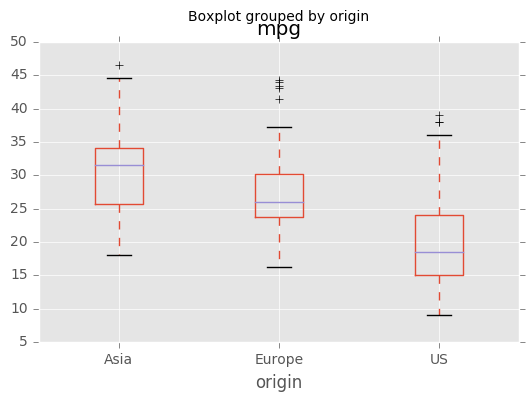

In [3]:
df.boxplot('mpg', 'origin')

plt.show()

## Slide 8/9: Encoding dummy variables

In [4]:
df_origin = pd.get_dummies(df)

df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [5]:
df_origin = df_origin.drop('origin_Asia', axis=1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


## Slide 10: Linear regression with dummy variables

In [6]:
y = df_origin['mpg'].values
X = df_origin.drop('mpg', axis=1).values

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

print(ridge.score(X_test, y_test))

0.719064519022


# ch4_2: Imputation

## Slide 2

In [8]:
df = pd.read_csv('../datasets/diabetes.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.triceps.value_counts().head()

0     227
32     31
30     27
27     23
23     22
Name: triceps, dtype: int64

In [11]:
df.insulin.value_counts().head()

0      374
105     11
140      9
130      9
120      8
Name: insulin, dtype: int64

In [12]:
df.bmi.value_counts().head()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
Name: bmi, dtype: int64

In [13]:
df_drop = pd.read_csv('../datasets/diabetes.csv',
                header=None, names = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
                                     'dpf', 'age', 'diabetes'])
df_drop.insulin.replace(0, np.nan, inplace=True)
df_drop.triceps.replace(0, np.nan, inplace=True)
df_drop.bmi.replace(0, np.nan, inplace=True)

## Slide 3: Dropping rows with missing data

In [14]:
df_drop = df_drop.dropna()
print("Shape of DataFrame Before Dropping All Rows with Missing Values: " + str(df.shape))
print("Shape of DataFrame After Dropping All Rows with Missing Values: " + str(df_drop.shape))

Shape of DataFrame Before Dropping All Rows with Missing Values: (768, 9)
Shape of DataFrame After Dropping All Rows with Missing Values: (769, 9)


## Slide 4: Imputing missing data

In [15]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

## Slide 5: Building a ML pipeline in scikit-learn

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = df['diabetes'].values
X = df.drop('diabetes', axis=1).values

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()

steps = [('imputation', imp),
        ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))

Accuracy: 0.753246753247


# ch4_3

## Slide 2/3: Why scale?

In [17]:
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/winequality-red.csv' , sep = ';')
X = df.drop('quality' , 1)
y1 = df['quality'].values
y = y1 <= 5
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
X['density'].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

In [19]:
X['total sulfur dioxide'].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

## Slide 5: Scaling in scikit-learn

In [20]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: " + str(np.mean(X.values))) 
print("Standard Deviation of Unscaled Features: " + str(np.std(X.values)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: " + str(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: " + str(np.std(X_scaled)))

Mean of Unscaled Features: 8.13421922452
Standard Deviation of Unscaled Features: 16.7265339794
Mean of Scaled Features: 2.54662653149e-15
Standard Deviation of Scaled Features: 1.0


## Slide 6: Scaling in a Pipeline

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = dict(knn__n_neighbors=np.arange(1, 50))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.746875
Accuracy without Scaling: 0.646875


## Slide 7: Scaling and CV in a Pipeline

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

# Specify the hyperparameter space
param_grid = np.arange(1,50)
parameters = dict(knn__n_neighbors=param_grid)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Instantiate the GridSearchCV object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the train set and predict on test set
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.7604166666666666
             precision    recall  f1-score   support

      False       0.80      0.76      0.78       272
       True       0.71      0.75      0.73       208

avg / total       0.76      0.76      0.76       480

Tuned Model Parameters: {'knn__n_neighbors': 41}
